# Digit Number

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import numpy as np

np.random.seed(4)

## Dataset

In [2]:

mnist = fetch_openml('mnist_784')
X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy().astype(int)


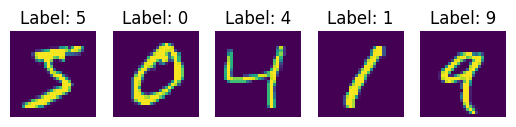

In [3]:
# show
num_imgs = 5
fig, axes = plt.subplots(1, num_imgs)
for i in range(num_imgs):
    axes[i].imshow(X[i].reshape(28,28))
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')
plt.show()

## Pre-Processing

In [4]:
y_ohe = OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
def sigmoid(x):
    x = np.clip(x, -100, 100)
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return x * (1 - x)

In [6]:
def forward_prop(w1, w2, b1, b2, x):
    # IMPLEMENT HERE
    pass

def back_prop(m,w1,w2,z1,h1,z2,y_hat,x,y):
    # IMPLEMENT HERE
    pass

## Initialization

In [7]:
## Initialize weights
n_x = X_train.shape[1]
n_y = y_train.shape[1]
n_h = 100

w1 = np.random.rand(n_x, n_h) - 0.5
w2 = np.random.rand(n_h, n_y) - 0.5
b1 = np.random.rand(1, n_h) - 0.5
b2 = np.random.rand(1, n_y) - 0.5

## Main Loop

In [12]:
def forward_prop(w1, w2, b1, b2, x):
    z1 = x @ w1 + b1
    h1 = sigmoid(z1)

    z2 = h1 @ w2 + b2
    y_hat = sigmoid(z2)

    return z1, h1, z2, y_hat

def back_prop(m,w1,w2,z1,h1,z2,y_hat,x,y):
    dz2 = y_hat - y
    dw2 = h1.T @ dz2
    db2 = np.ones((1,m)) @ dz2 / m

    dz1 = (dz2 @ w2.T) * sigmoid_prime(h1)
    dw1 = x.T @ dz1

    db1 = np.ones((1,m)) @ dz1 / m

    return dw1, db1, dw2, db2



In [18]:
epoch = 50
losses = []
m = y_train.shape[0]        # of data set
lr = 0.01                   # Learning rate

y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)
for i in range(epoch):
    z1, a1, z2, y_hat = forward_prop(w1, w2, b1, b2, X_train)
    loss = (-1/m) * np.sum(y_train * np.log(y_hat) + 1e-10 + (1-y_train) * np.log(1-y_hat + 1e-10))
    dw1, dw2, db1, db2 = back_prop(m,w1,w2,z1,a1,z2,y_hat,X_train,y_train)
    losses.append(loss)

    dw1, db1, dw2, db2 = back_prop(m,w1,w2,z1,a1,z2,y_hat,X_train,y_train)
    w1 = w1 - lr * dw1
    b1 = b1 - lr * db1
    w2 = w2 - lr * dw2
    b2 = b2 - lr * db2

    print(f'loss: {loss}')

loss: 58.791711447186465
loss: 35.29182165746547
loss: 36.339541451684745
loss: 33.405736831326486
loss: 31.70558196221304
loss: 33.398427408921556
loss: 38.85453052194942
loss: 40.212743422088856
loss: 33.8099742230177
loss: 34.587846185974456
loss: 30.889316905105414
loss: 26.254306812712787
loss: 30.225847846609504
loss: 23.113628421621083
loss: 22.907727739413055
loss: 18.716471266892924
loss: 22.796512291887414
loss: 16.788215251066575
loss: 15.24388738058368
loss: 16.619340395214543
loss: 14.821728010307051
loss: 19.4744047588988
loss: 14.612702942483638
loss: 20.98961867657509
loss: 14.776720653509159
loss: 22.50534169201003
loss: 14.12360206641172
loss: 16.837010298106655
loss: 13.256845939761329
loss: 14.573146833501228
loss: 12.853401225739743
loss: 15.136055075702021
loss: 12.661645726115665
loss: 14.629868587161834
loss: 12.479107846296843
loss: 14.312702381769839
loss: 12.294370860760928
loss: 14.429036461821877
loss: 12.076758439321813
loss: 14.07636543399866
loss: 12.417

## Loss

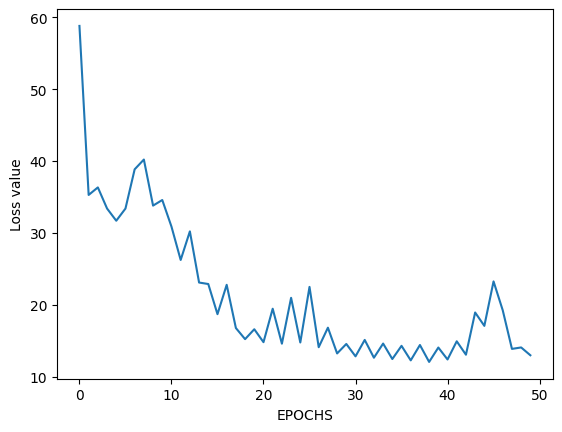

In [19]:
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

## Accuracy

In [20]:
_, _, _, y_test_hat = forward_prop(w1, w2, b1, b2, X_test)
y_test_hat_true = np.argmax(y_test_hat, axis=1)
accuracy = accuracy_score(y_test_true, y_test_hat_true)
print(f'loss: {loss:.2f}, acc: {accuracy:.2f}')

loss: 13.00, acc: 0.88
